<a href="https://colab.research.google.com/github/Mukul1Panwar/Machine_Learning-UnSupervised/blob/main/Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.35MB/s]


In [3]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
df = df.drop('CustomerID',axis=1)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

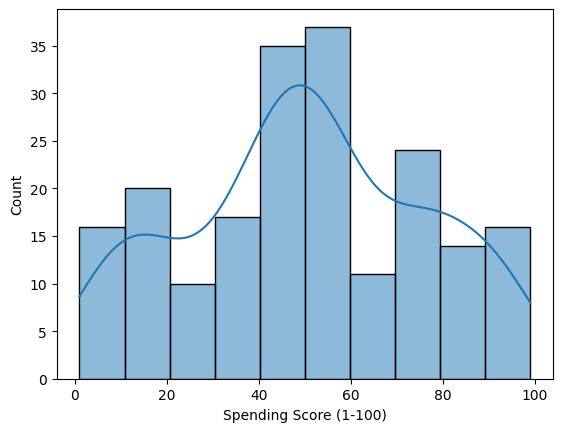

In [13]:
sns.histplot(df['Spending Score (1-100)'],bins=10,kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

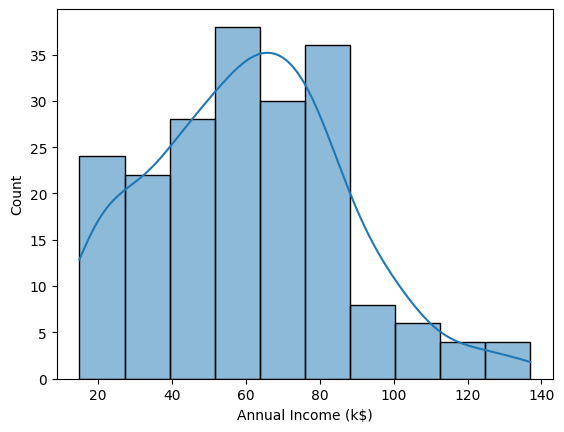

In [14]:
sns.histplot(df['Annual Income (k$)'],bins=10,kde=True)

<Axes: xlabel='count', ylabel='Gender'>

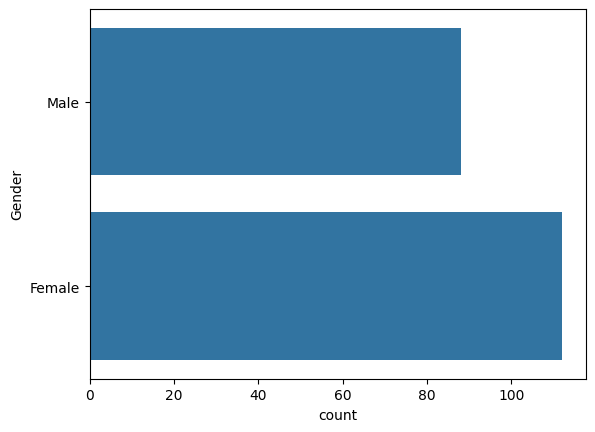

In [15]:
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

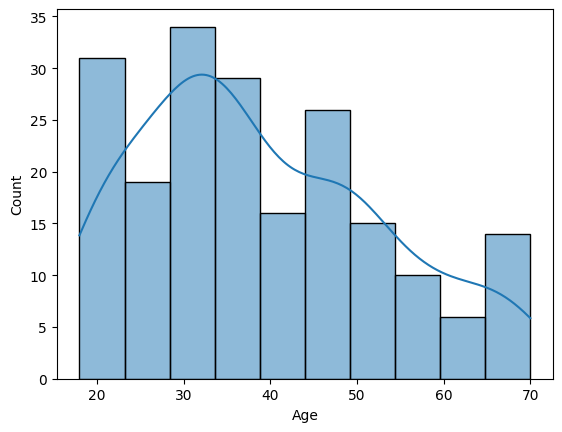

In [16]:
sns.histplot(df['Age'],bins=10,kde=True) # bins 10 : data would be divided into 10 equal intervals

In [17]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

In [18]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [19]:
cat = ['Gender']
num = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [20]:
from sklearn.compose import ColumnTransformer

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]

)

In [22]:
df_processed = preprocessor.fit_transform(df)

In [23]:
# it will generate additionally two more col. one for male and second for female

In [24]:
type(df_processed)

numpy.ndarray

In [25]:
df_processed.shape

(200, 5)

In [26]:
# Get feature names after OneHotEncoding
feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(df_processed, columns=feature_names)
print(X_processed_df.head())



   cat__Gender_Female  cat__Gender_Male  num__Age  num__Annual Income (k$)  \
0                 0.0               1.0 -1.424569                -1.738999   
1                 0.0               1.0 -1.281035                -1.738999   
2                 1.0               0.0 -1.352802                -1.700830   
3                 1.0               0.0 -1.137502                -1.700830   
4                 1.0               0.0 -0.563369                -1.662660   

   num__Spending Score (1-100)  
0                    -0.434801  
1                     1.195704  
2                    -1.715913  
3                     1.040418  
4                    -0.395980  


In [27]:
from sklearn.decomposition import PCA

In [113]:
# pca(n_components = x) x is the no. of comp. in pca. it means it consists the lots of % amount of your data
# in our case 2 comp contain 65% of data : for 2 , 2d works for visualize
# for 3 comp contain 86% of data : in this case 3d visualizition works

In [84]:
pca = PCA(n_components=3)
pca_scaled = pca.fit_transform(df_processed)

In [85]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()


np.float64(0.8610219255852741)

In [29]:
type(pca_scaled)

numpy.ndarray

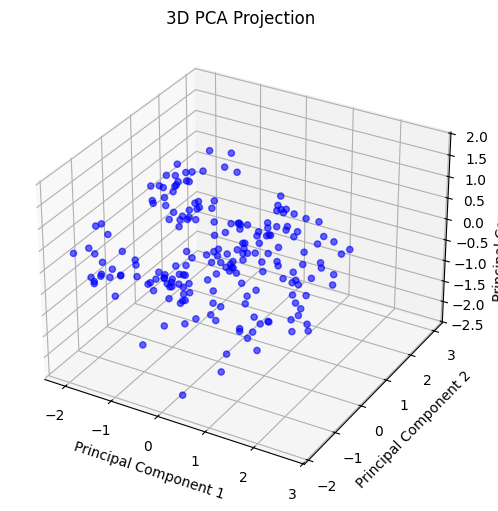

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
ax.scatter(pca_scaled[:, 0], pca_scaled[:, 1], pca_scaled[:, 2],c='blue', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Projection')
plt.show()


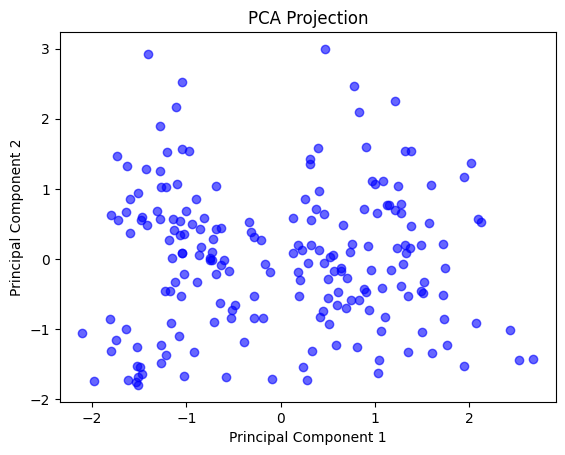

In [30]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c='blue', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()


In [31]:
from sklearn.cluster import KMeans

In [32]:
# lets find out the optimal value for the number of cluster

In [87]:
wcss = []
for k in range (2,10):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(pca_scaled)
  wcss.append(kmeans.inertia_)

In [88]:
wcss

[390.8226062217433,
 306.2931774615025,
 206.87605821546828,
 170.070604230871,
 134.55884136140722,
 123.90976154868875,
 107.453622394687,
 95.91469053005]

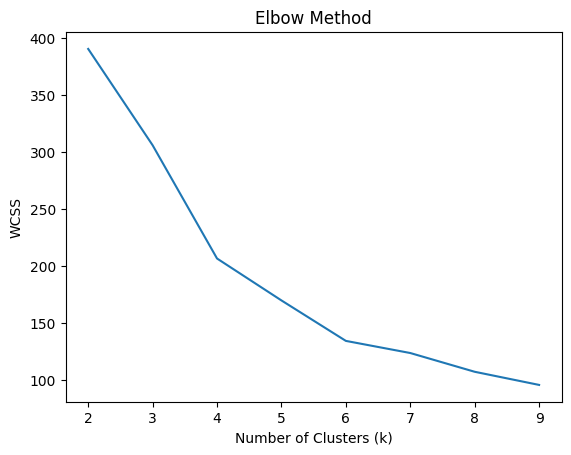

In [89]:
plt.plot(range(2,10),wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [90]:
!pip install kneed

In [91]:
from kneed import KneeLocator

In [92]:
kl = KneeLocator(range(2,10),wcss,curve='convex',direction='decreasing')

In [93]:
kl.elbow

np.int64(4)

In [94]:
from sklearn.metrics import silhouette_score

In [95]:
sil_score = []
for k in range (2,10):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(pca_scaled)
  score = silhouette_score(pca_scaled,kmeans.labels_)
  sil_score.append(score)

In [96]:
sil_score

[np.float64(0.33410399239327115),
 np.float64(0.3546885063480961),
 np.float64(0.4013079612827255),
 np.float64(0.4140266545003093),
 np.float64(0.3856617121494717),
 np.float64(0.3898837699814062),
 np.float64(0.3956826325778309),
 np.float64(0.4104799445721634)]

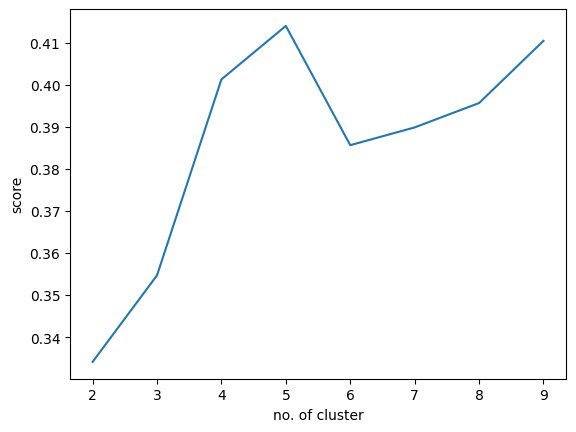

In [97]:
plt.plot(range(2,10),sil_score)
plt.xlabel("no. of cluster")
plt.ylabel("score")
plt.show()

In [98]:
# Apply KMeans on PCA output
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_scaled)


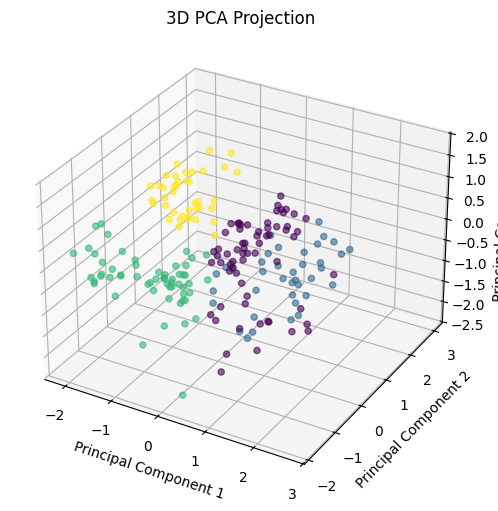

In [105]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
ax.scatter(pca_scaled[:, 0], pca_scaled[:, 1], pca_scaled[:, 2],c=cluster_labels, alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Projection')
plt.show()


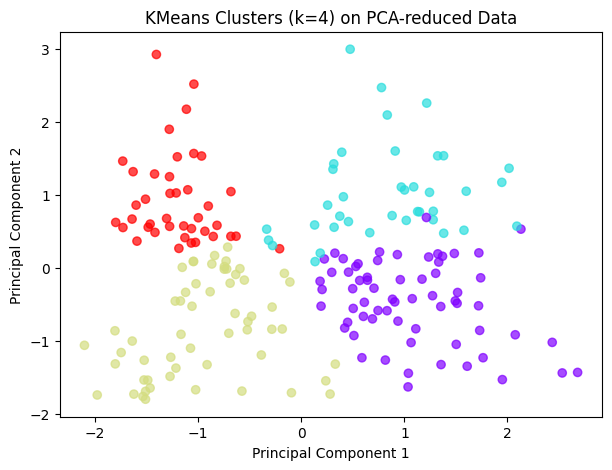

In [103]:
plt.figure(figsize=(7,5))
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (k=4) on PCA-reduced Data')
plt.show()


In [106]:
# Suppose your original dataset is df
df['Cluster'] = cluster_labels


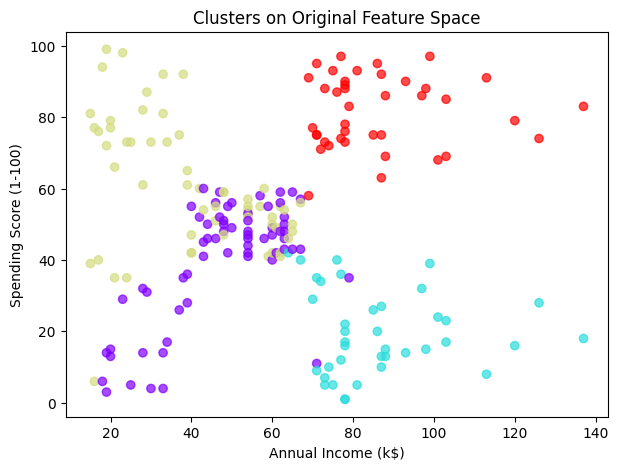

In [107]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters on Original Feature Space')
plt.show()


In [108]:
# See how many samples are in each cluster
print(df['Cluster'].value_counts())

Cluster
0    65
2    57
3    40
1    38
Name: count, dtype: int64


In [109]:
# Compute average values of each feature per cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        39.368421           86.500000               19.578947
2        25.438596           40.000000               60.298246
3        32.875000           86.100000               81.525000


In [110]:
cluster_names = {
    0: 'Older, mid-income, moderate spenders, possibly loyal customers',
    1: 'Young, high-income, high spenders, premium/target customers',
    2: 'Young, low-income, high spenders, aspirational buyers or trend-seekers',
    3: 'Middle-aged, high-income, low spenders, potential customers to target for promotions'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_names)


In [111]:
df['Cluster_Label']

,Cluster_Label
0,"Young, low-income, high spenders, aspirational..."
1,"Young, low-income, high spenders, aspirational..."
2,"Young, low-income, high spenders, aspirational..."
3,"Young, low-income, high spenders, aspirational..."
4,"Young, low-income, high spenders, aspirational..."
...,...
195,"Middle-aged, high-income, low spenders, potent..."
196,"Young, high-income, high spenders, premium/tar..."
197,"Middle-aged, high-income, low spenders, potent..."
198,"Young, high-income, high spenders, premium/tar..."


In [77]:
# df = pd.concat([df,df['Cluster']],axis=1)

In [112]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label,Cluster
0,Male,19,15,39,"Young, low-income, high spenders, aspirational...",2
1,Male,21,15,81,"Young, low-income, high spenders, aspirational...",2
2,Female,20,16,6,"Young, low-income, high spenders, aspirational...",2
3,Female,23,16,77,"Young, low-income, high spenders, aspirational...",2
4,Female,31,17,40,"Young, low-income, high spenders, aspirational...",2
